In [1]:
from geneticalgorithm3 import *

In [2]:
not_nan

,flag,lat_index,lon_index
3,r,0,47
4,r,0,48
6,r,0,49
8,r,0,50
9,r,0,51
...,...,...,...
32264,r,374,77
32265,r,375,76
32266,r,375,77
32267,r,376,77


generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

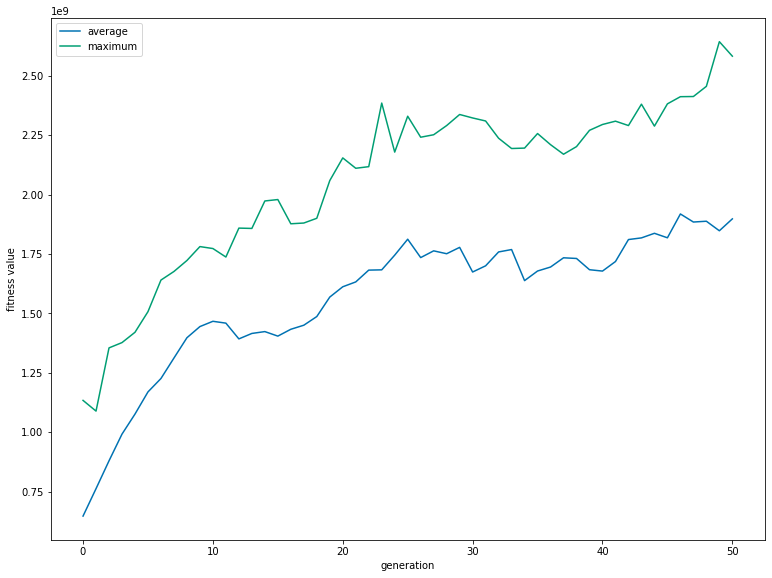

In [3]:
### 1e7
number_generations = 50
population_size = 100
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-16/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-16.png')

In [4]:
df = pandas.read_csv('data/processed/ga-results-16/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,6187,r,50,76
1,6479,r,51,162
2,7197,r,55,164
3,7370,r,56,157
4,9227,r,66,116
5,9763,r,68,166
6,965,r,12,68
7,12532,r,80,188
8,14898,r,93,160
9,8110,r,60,159


In [5]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10

In [6]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-16.nc')

In [7]:
ds = xr.open_dataset('data/processed/ga-16.nc')

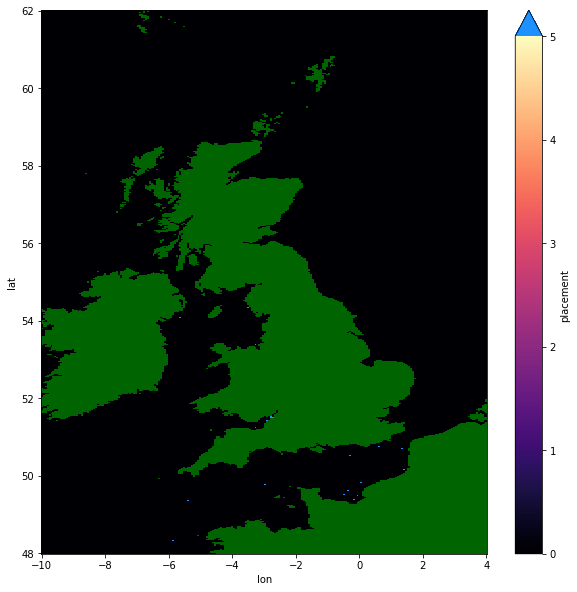

In [8]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

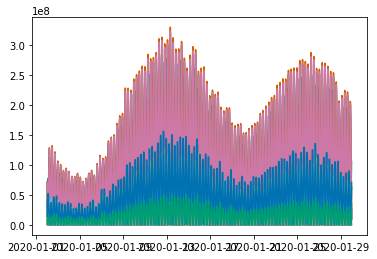

In [9]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    

# plt.legend()
    

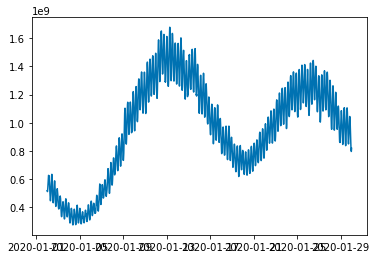

In [10]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [11]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

2582537313.398075

In [12]:
f_best[-1]

2582537313.398075

In [ ]:
#######

In [5]:
ds_range_mean = xr.open_dataset('data/processed/range-mean-power3.nc')

In [6]:
n = 20
av_range = ds_range_mean.power.values
max_idx = np.zeros((n,2),dtype=int)
for i in range(n):
    av_max = np.max(av_range[av_range>0])
    max_idx[i,0] = np.where(av_range==av_max)[0][0]
    max_idx[i,1] = np.where(av_range==av_max)[1][0]
    av_range[max_idx[i,0],max_idx[i,1]] = np.nan


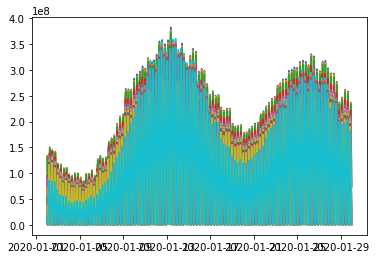

In [7]:
sol_power = 0
plt.figure()
for i in range(max_idx.shape[0]):
    curve = r_power[:,max_idx[i,0],max_idx[i,1]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'r,{max_idx[i]}')
    
# plt.legend()

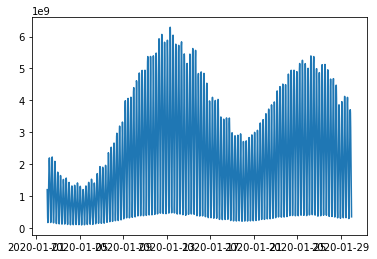

In [8]:
plt.figure()
plt.plot(ds_range.time.values,sol_power)
# plt.yscale('log')
# plt.ylim([0,1e5])

In [9]:
np.mean(sol_power)

2069236995.3639069

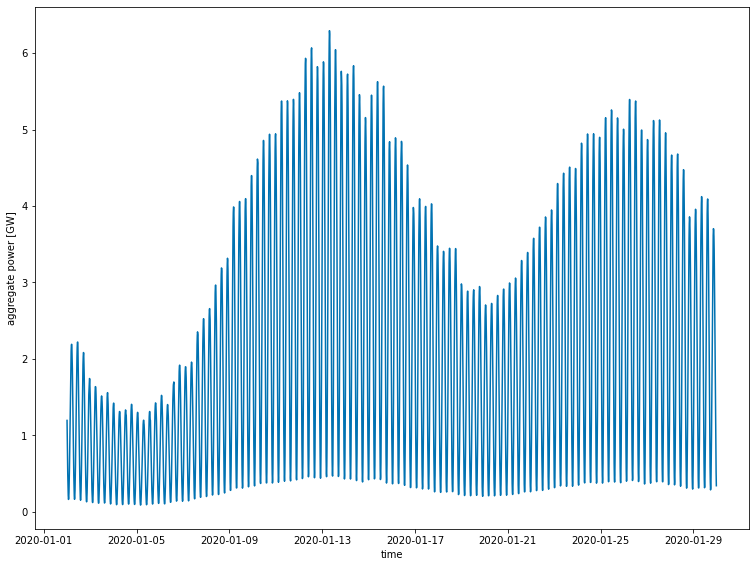

In [15]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,sol_power/1e9)
plt.xlabel('time')
plt.ylabel('aggregate power [GW]')

# plt.savefig('figures/for-report/ga-baseline-power.png')

In [10]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

2760415991.930106

In [19]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values

for j in range(max_idx.shape[0]):
    uk[max_idx[j,0],max_idx[j,1]] = 10
    


In [20]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-theo-range.nc')

In [17]:
ds = xr.open_dataset('data/processed/ga-theo-range.nc')

In [18]:
ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

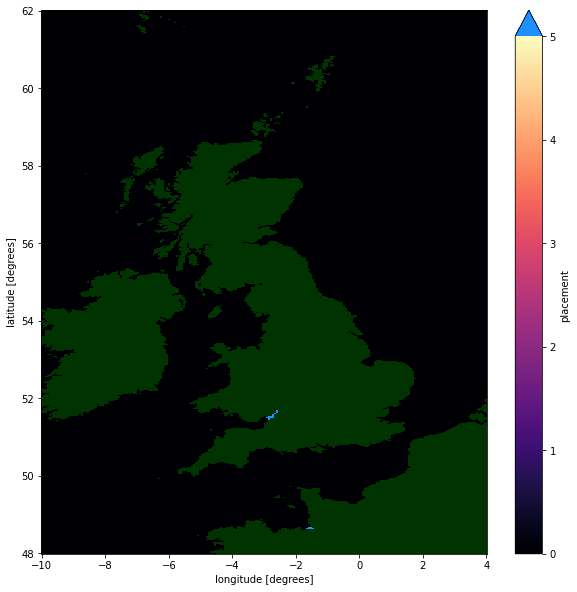

In [21]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('#003300')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  
# plt.savefig('figures/for-report/ga-baseline-map.png')

In [ ]:
#######

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

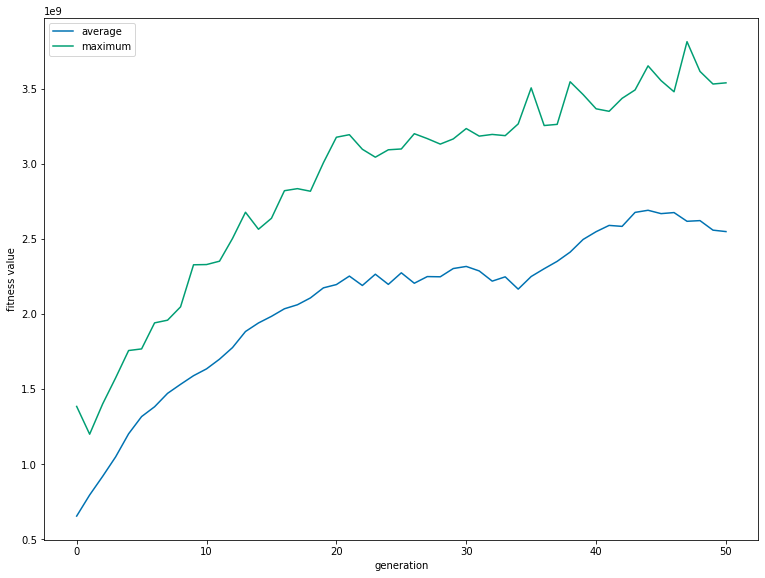

In [23]:
### 1e7
number_generations = 50
population_size = 500
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-17/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-17.png')

In [24]:
df = pandas.read_csv('data/processed/ga-results-17/gen-50.csv')
df

,Unnamed: 0,flag,lat_index,lon_index
0,10967,r,73,183
1,10728,r,72,182
2,10962,r,73,180
3,11201,r,74,182
4,12096,r,78,182
5,12097,r,78,183
6,13376,r,84,186
7,14776,r,92,181
8,17163,r,113,59
9,14442,r,90,177


In [25]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10

In [26]:
placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



placement_xr.to_netcdf(path=f'data/processed/ga-17.nc')

In [27]:
ds = xr.open_dataset('data/processed/ga-17.nc')

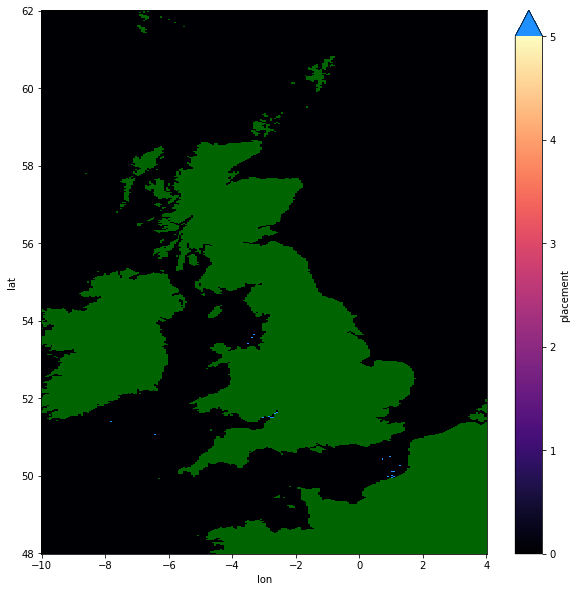

In [28]:
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

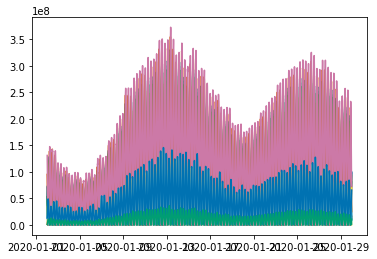

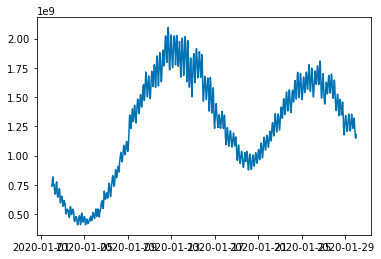

In [29]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    
    
plt.figure()
plt.plot(ds_range.time.values,sol_power)
    

In [30]:
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
(sol_mean**2)/rmsd

3539943764.0170736

In [31]:
f_best[-1]

3539943764.0170736

In [ ]:
### 3e7

In [2]:
not_nan

,flag,lat_index,lon_index
54,r,20,121
64,r,21,120
65,r,21,121
66,r,21,122
76,r,22,119
...,...,...,...
8938,r,257,111
8939,r,257,113
8940,r,257,114
8941,r,258,106


generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

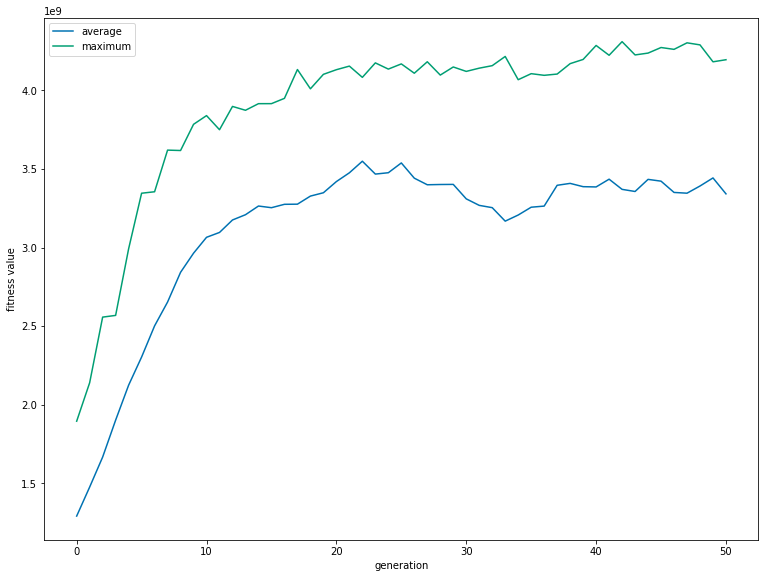

In [3]:
### 3e7
number_generations = 50
population_size = 500
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-18/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-18.png')

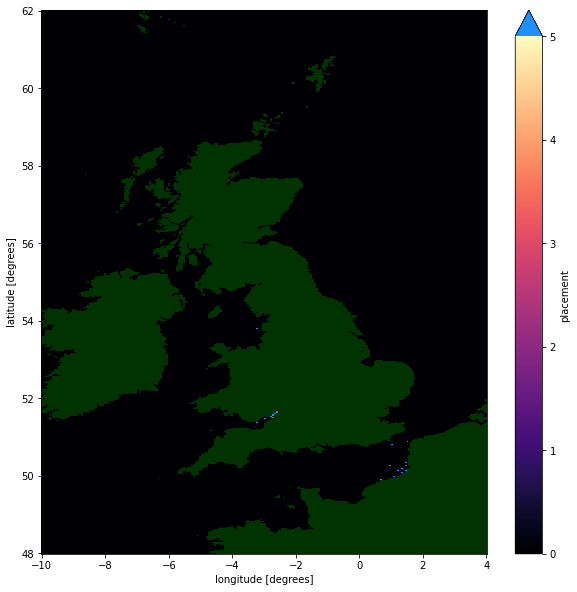

In [2]:
run = 18

df = pandas.read_csv(f'data/processed/ga-results-{run}/gen-50.csv')

ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10
    

placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


# placement_xr.to_netcdf(path=f'data/processed/ga-{run}.nc')

ds = xr.open_dataset(f'data/processed/ga-{run}.nc')

ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('#003300')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  
# plt.savefig('figures/for-report/ga-3e7-map.png')

4194933314.429044


NameError: name 'f_best' is not defined

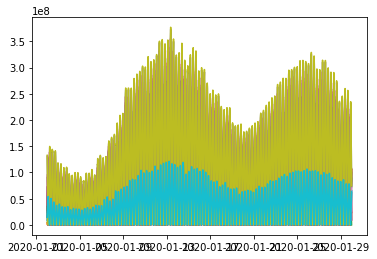

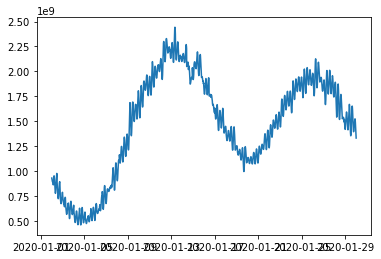

In [3]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    
    
plt.figure()
plt.plot(ds_range.time.values,sol_power)
    
    
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
print((sol_mean**2)/rmsd)

f_best[-1]

In [4]:
np.mean(sol_power)

1464081286.59832

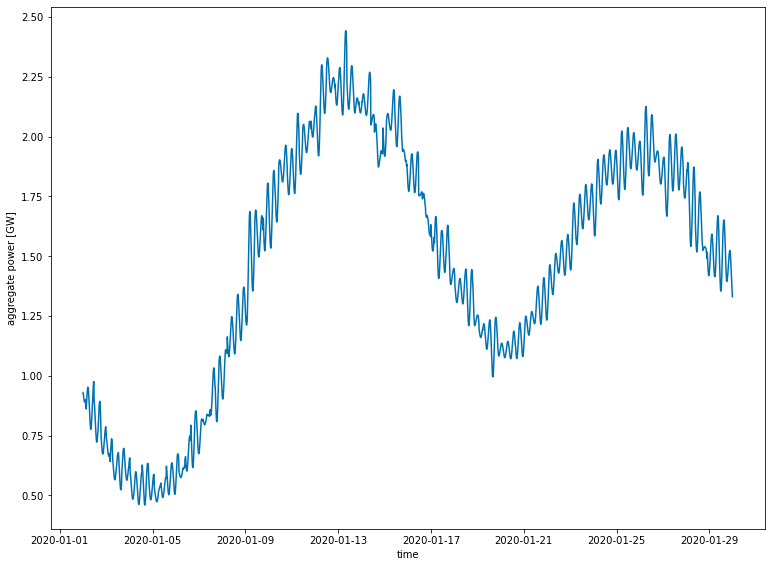

In [27]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,sol_power/1e9)
plt.xlabel('time')
plt.ylabel('aggregate power [GW]')

# plt.savefig('figures/for-report/ga-3e7-power.png')

In [7]:
### 5e7

In [2]:
not_nan

,flag,lat_index,lon_index
25,r,20,121
26,r,21,120
27,r,21,121
28,r,21,122
30,r,22,119
...,...,...,...
3640,r,257,111
3641,r,257,113
3642,r,257,114
3643,r,258,106


generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

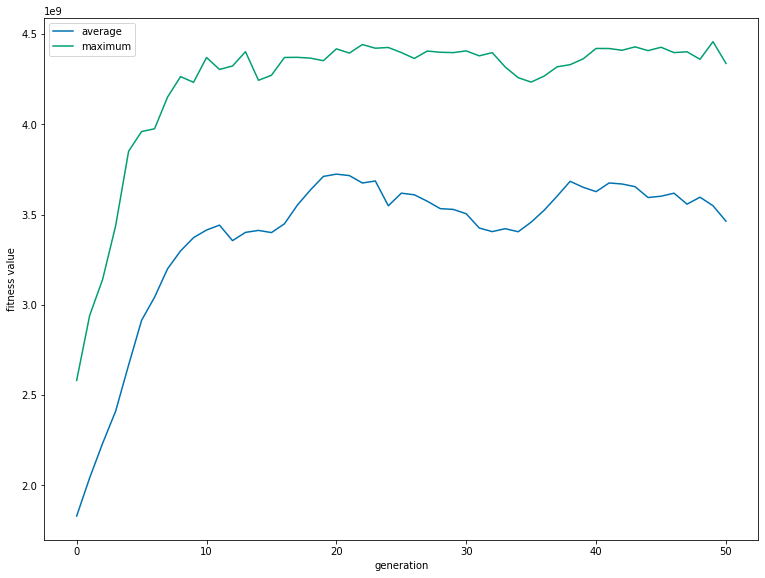

In [3]:
### 5e7
number_generations = 50
population_size = 500
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-19/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-19.png')

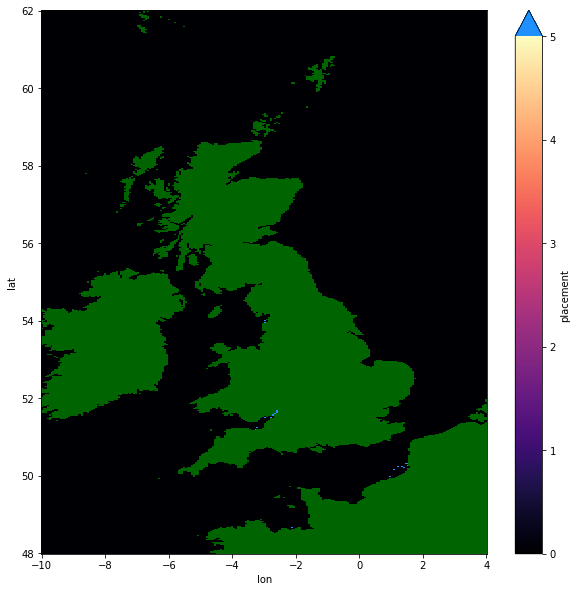

In [4]:
run = 19

df = pandas.read_csv(f'data/processed/ga-results-{run}/gen-50.csv')

ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10
    

placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


placement_xr.to_netcdf(path=f'data/processed/ga-{run}.nc')

ds = xr.open_dataset(f'data/processed/ga-{run}.nc')

cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

4336819725.151431


4336819725.151431

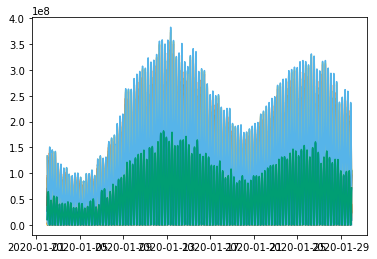

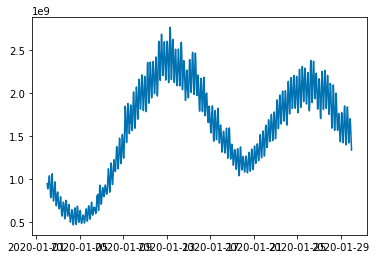

In [5]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    
    
plt.figure()
plt.plot(ds_range.time.values,sol_power)
    
    
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
print((sol_mean**2)/rmsd)

f_best[-1]

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

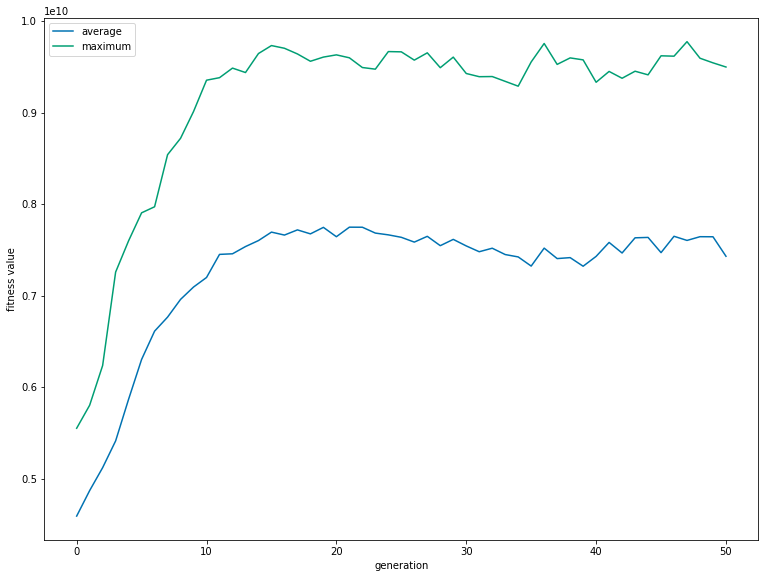

In [7]:
### 5e7
number_generations = 50
population_size = 500
chromosome_length = 50

args = [number_generations,population_size,chromosome_length]
chrom_best,f_best,f_mean = ga(*args)

for i in range(number_generations+1):
    df_best = not_nan.loc[chrom_best[i,:]]
    df_best.to_csv(f'data/processed/ga-results-20/gen-{i}.csv',index=True)

g_plot = np.arange(number_generations+1)
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(g_plot,f_mean,label='average')
plt.plot(g_plot,f_best,label='maximum')
plt.xlabel('generation')
plt.ylabel('fitness value')
plt.legend()
plt.savefig('figures/ga-convergence-20.png')

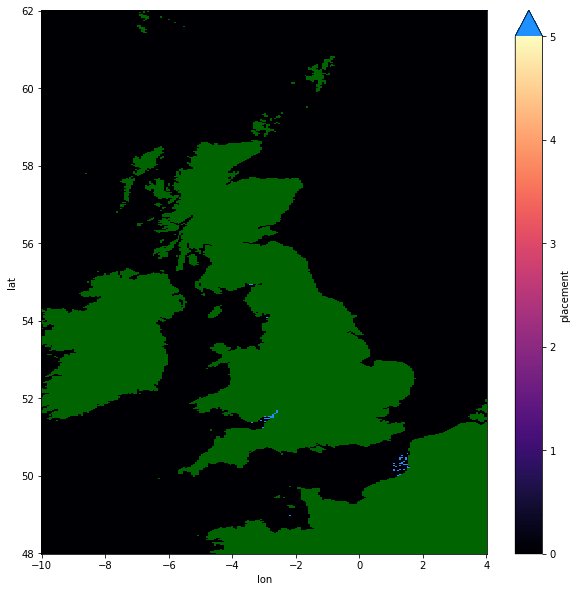

In [8]:
run = 20

df = pandas.read_csv(f'data/processed/ga-results-{run}/gen-50.csv')

ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df)):
    uk[df.iloc[j]['lat_index'],df.loc[j]['lon_index']] = 10
    

placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


placement_xr.to_netcdf(path=f'data/processed/ga-{run}.nc')

ds = xr.open_dataset(f'data/processed/ga-{run}.nc')

cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('darkgreen')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  

9498366048.432976


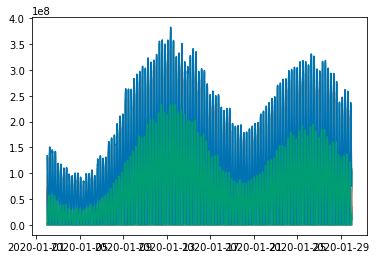

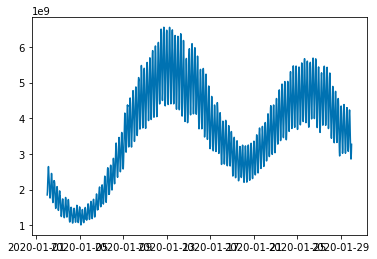

In [9]:
sol_power = 0
plt.figure()
for i in range(len(df)):
    curve = r_power[:,df.loc[i,('lat_index')],df.loc[i,('lon_index')]]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df.iloc[i,0]}')
    
    
plt.figure()
plt.plot(ds_range.time.values,sol_power)
    
    
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
print((sol_mean**2)/rmsd)


In [11]:
### 5e7
number_generations = 50
population_size = 500
chromosome_length = 20

args = [number_generations,population_size,chromosome_length]

for j in range(1,101):
    chrom_best,f_best,f_mean = ga(*args)

    for i in range(number_generations+1):
        df_best = not_nan.loc[chrom_best[i,:]]
        df_best.to_csv(f'data/processed/ga-results-21/run-{j}-gen-{i}.csv',index=True)

    g_plot = np.arange(number_generations+1)
    plt.figure(figsize=(12.8,9.6))
    plt.style.use('seaborn-colorblind')
    plt.plot(g_plot,f_mean,label='average')
    plt.plot(g_plot,f_best,label='maximum')
    plt.xlabel('generation')
    plt.ylabel('fitness value')
    plt.legend()
    plt.savefig(f'figures/ga-convergence-21/run-{j}.png')
    plt.close()

generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation

generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  140.78098011016846
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done

generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  140.38550472259521
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done

generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  138.39539504051208
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done

generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  140.02122735977173
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done

generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  139.5592668056488
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done


generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  140.08904147148132
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done

generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  139.10546445846558
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: do

generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  139.17129945755005
generation 0: done
generation 1: do

generation 50: done

run time:  139.80441689491272
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done

generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  139.6542477607727
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done


generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  138.76392483711243
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done
generation 30: done
generation 31: done
generation 32: done
generation 33: done
generation 34: done
generation 35: done

generation 32: done
generation 33: done
generation 34: done
generation 35: done
generation 36: done
generation 37: done
generation 38: done
generation 39: done
generation 40: done
generation 41: done
generation 42: done
generation 43: done
generation 44: done
generation 45: done
generation 46: done
generation 47: done
generation 48: done
generation 49: done
generation 50: done

run time:  139.75693607330322
generation 0: done
generation 1: done
generation 2: done
generation 3: done
generation 4: done
generation 5: done
generation 6: done
generation 7: done
generation 8: done
generation 9: done
generation 10: done
generation 11: done
generation 12: done
generation 13: done
generation 14: done
generation 15: done
generation 16: done
generation 17: done
generation 18: done
generation 19: done
generation 20: done
generation 21: done
generation 22: done
generation 23: done
generation 24: done
generation 25: done
generation 26: done
generation 27: done
generation 28: done
generation 29: done

In [44]:
multiple = np.zeros((0),dtype=int)
for j in range(1,101):
    df = pandas.read_csv(f'data/processed/ga-results-21/run-{j}-gen-50.csv')
    sol = df['Unnamed: 0']
    multiple = np.append(multiple,sol)
    
multiple.shape

(2000,)

In [45]:
label = not_nan.index
frequency = []
for k in label:
    frequency.append(np.count_nonzero(multiple==k))

df_freq = not_nan
df_freq['frequency'] = frequency
df_freq

,flag,lat_index,lon_index,frequency
25,r,20,121,0
26,r,21,120,0
27,r,21,121,0
28,r,21,122,0
30,r,22,119,1
...,...,...,...,...
3640,r,257,111,0
3641,r,257,113,1
3642,r,257,114,1
3643,r,258,106,0


In [46]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df_freq)):
    uk[df_freq.iloc[j]['lat_index'],df_freq.iloc[j]['lon_index']] = df_freq.iloc[j]['frequency']
    

placement_xr = xr.Dataset({
    'frequency': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


# placement_xr.to_netcdf(path=f'data/processed/ga-21-freq.nc')




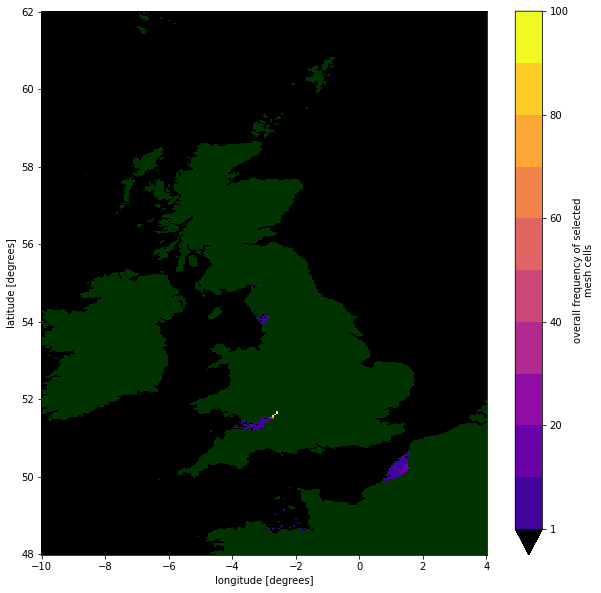

In [3]:
ds = xr.open_dataset(f'data/processed/ga-21-freq.nc')

ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')
ds['frequency'] = ds.frequency.assign_attrs(long_name='overall frequency of selected mesh cells')

cmap = mpl.cm.get_cmap('plasma').copy()
cmap.set_bad('#003300')
cmap.set_under('black')

ds.frequency.plot(size=10,aspect=1,levels=[1,10,20,30,40,50,60,70,80,90,100],vmin=1,vmax=100,cmap=cmap)  
# plt.savefig('figures/for-report/ga-histogram-map-edit.png')

In [33]:
df_freq = df_freq.sort_values(by=['frequency'])

NameError: name 'df_freq' is not defined

In [49]:
df_best = df_freq.iloc[-20:]
df_best

,flag,lat_index,lon_index,frequency
2504,r,131,118,14
1515,r,79,189,15
1757,r,84,190,15
1803,r,85,189,15
2501,r,130,119,15
1467,r,78,188,16
1514,r,79,188,16
1804,r,85,190,17
1710,r,83,191,17
1707,r,83,188,19


In [50]:
# df_best.to_csv('data/processed/ga-21-sol.csv')

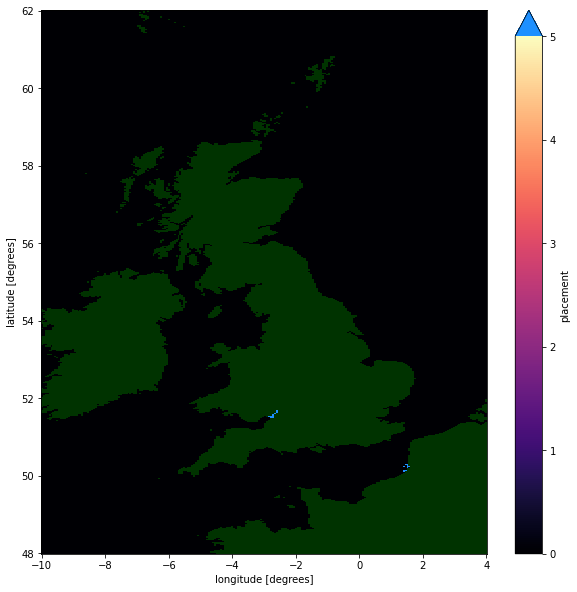

In [39]:
df_best = pandas.read_csv('data/processed/ga-21-sol.csv')
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(df_best)):
    uk[df_best.iloc[j]['lat_index'],df_best.iloc[j]['lon_index']] = 10
    

placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


# placement_xr.to_netcdf(path=f'data/processed/ga-21-sol.nc')

ds = xr.open_dataset(f'data/processed/ga-21-sol.nc')

ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('#003300')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  
# plt.savefig('figures/for-report/ga-mostfrequent-map.png')

4321855572.189776


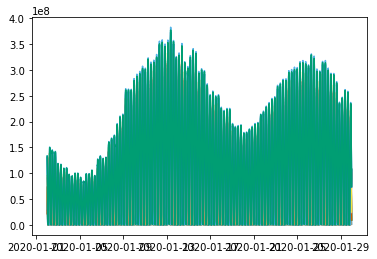

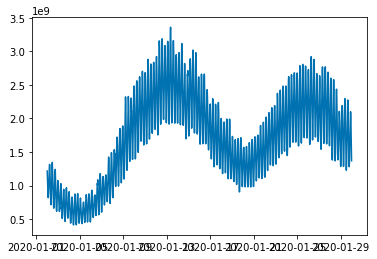

In [36]:
sol_power = 0
plt.figure()
for i in range(len(df_best)):
    curve = r_power[:,df_best.iloc[i]['lat_index'],df_best.iloc[i]['lon_index']]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{df_best.iloc[i,0]}')
    
    
plt.figure()
plt.plot(ds_range.time.values,sol_power)
    
    
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
print((sol_mean**2)/rmsd)


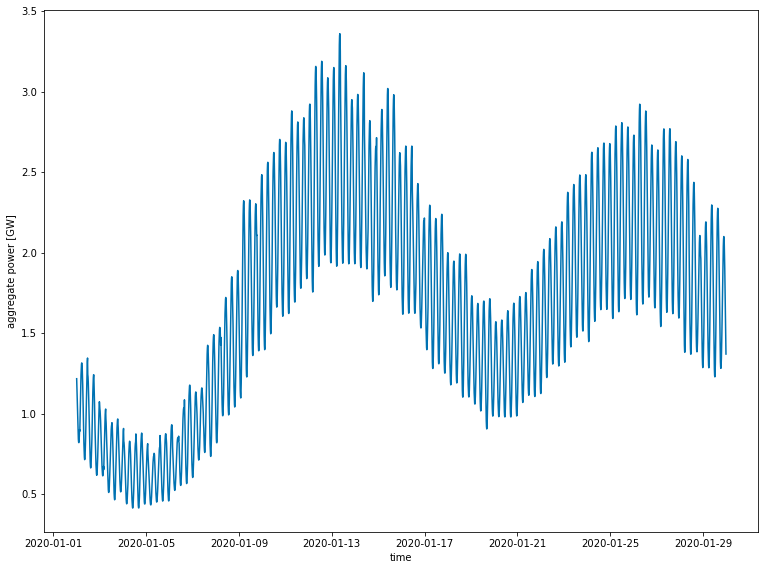

In [41]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,sol_power/1e9)
plt.xlabel('time')
plt.ylabel('aggregate power [GW]')

# plt.savefig('figures/for-report/ga-mostfrequent-power.png')

In [14]:
fitness_21 = np.zeros((100))
for j in range(1,101):
    df = pandas.read_csv(f'data/processed/ga-results-21/run-{j}-gen-50.csv')
    sol_power = 0
    for i in range(len(df)):
        curve = r_power[:,df.iloc[i]['lat_index'],df.iloc[i]['lon_index']]
        sol_power += curve
    sol_mean = np.mean(sol_power)
    rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
    fitness_21[j-1] = (sol_mean**2)/rmsd

In [20]:
print(np.mean(fitness_21/1e9),np.std(fitness_21/1e9))

4.4053082260305745 0.03668864164268826


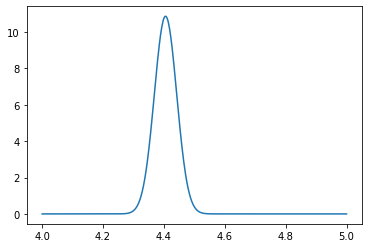

In [21]:
fitness_scaled = fitness_21/1e9
x = np.linspace(4,5,500)

plt.figure()
plt.plot(x,gaussian(np.mean(fitness_scaled),np.std(fitness_scaled)))

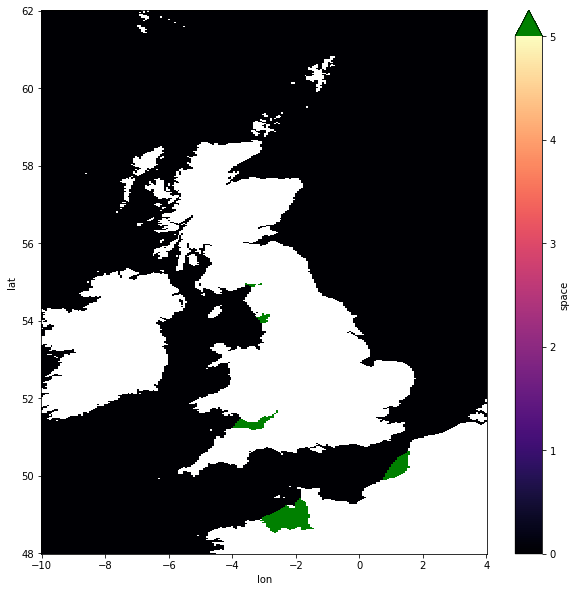

In [2]:
ds = xr.open_dataset('data/processed/range-search-space-5e7.nc')

cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('green')
cmap.set_bad('white')

ds.space.plot(size=10,aspect=1,vmax=5,cmap=cmap)  

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 519, lon: 232)
Coordinates:
  * lat      (lat) float32 48.0 48.03 48.05 48.08 ... 61.92 61.95 61.97 62.0
  * lon      (lon) float32 -10.0 -9.939 -9.879 -9.818 ... 3.818 3.879 3.939 4.0
Data variables:
    space    (lat, lon) float64 ...

In [59]:
not_nan

,flag,lat_index,lon_index,frequency
25,r,20,121,0
26,r,21,120,0
27,r,21,121,0
28,r,21,122,0
30,r,22,119,1
...,...,...,...,...
3640,r,257,111,0
3641,r,257,113,1
3642,r,257,114,1
3643,r,258,106,0


In [60]:
bds = not_nan[not_nan['lon_index']>165]
# bds.to_csv('data/processed/baiedesomme.csv')
len(bds)

188

In [61]:
lr = not_nan[not_nan['lat_index']<75]
lr = lr[lr['lon_index']<165]
# lr.to_csv('data/processed/larance.csv')
len(lr)

483

In [62]:
se = not_nan[not_nan['lat_index']>75]
se = se[se['lat_index']<150]
se = se[se['lon_index']<165]
# se.to_csv('data/processed/severnestuary.csv')
len(se)

146

In [63]:
mb = not_nan[not_nan['lat_index']>150]
mb = mb[mb['lat_index']<240]
mb = mb[mb['lon_index']<165]
# mb.to_csv('data/processed/morecambebay.csv')
len(mb)

39

In [64]:
sf = not_nan[not_nan['lat_index']>240]
# sf.to_csv('data/processed/solwayfirth.csv')
len(sf)

15

In [24]:
188+483+146+39+15

871

In [22]:
len(not_nan)

871

In [27]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values

for i in range(len(sf)):
    uk[sf.iloc[i]['lat_index'],sf.iloc[i]['lon_index']] = 1

for j in range(len(mb)):
    uk[mb.iloc[j]['lat_index'],mb.iloc[j]['lon_index']] = 2
    
for k in range(len(se)):
    uk[se.iloc[k]['lat_index'],se.iloc[k]['lon_index']] = 3
    
for l in range(len(lr)):
    uk[lr.iloc[l]['lat_index'],lr.iloc[l]['lon_index']] = 4
    
for m in range(len(bds)):
    uk[bds.iloc[m]['lat_index'],bds.iloc[m]['lon_index']] = 5
    
    
placement_xr = xr.Dataset({
    'sites': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


# placement_xr.to_netcdf(path=f'data/processed/range-search-space-coded.nc')

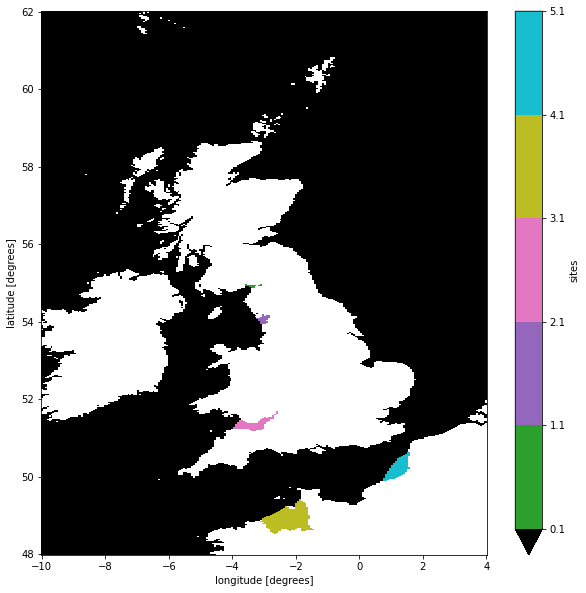

In [43]:
ds = xr.open_dataset(f'data/processed/range-search-space-coded.nc')

ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

cmap = mpl.cm.get_cmap('tab10').copy()
cmap.set_bad('white')
cmap.set_under('black')

ds.sites.plot(size=10,aspect=1,levels=6,vmin=0.1,vmax=5.1,cmap=cmap)  
# plt.savefig('figures/for-report/ga-searchspace-5e7.png')

In [51]:
df_sol = pandas.read_csv('data/processed/ga-21-sol.csv')
df_sol

,Unnamed: 0,flag,lat_index,lon_index,frequency
0,2504,r,131,118,14
1,1515,r,79,189,15
2,1757,r,84,190,15
3,1803,r,85,189,15
4,2501,r,130,119,15
5,1467,r,78,188,16
6,1514,r,79,188,16
7,1804,r,85,190,17
8,1710,r,83,191,17
9,1707,r,83,188,19


In [58]:
count_bds = 0
for i in range(20):
    if df_sol.iloc[i]['Unnamed: 0'] in bds.index:
        count_bds += 1
        
count_bds

10

In [76]:
bds_sort = bds.sort_values(by=['lon_index','lat_index'],ascending=[False,True])
bds_sort

,flag,lat_index,lon_index,frequency
1661,r,82,191,13
1710,r,83,191,17
2165,r,94,191,4
2183,r,95,191,2
2188,r,96,191,2
...,...,...,...,...
1312,r,75,179,1
1361,r,76,179,0
1072,r,70,178,1
1118,r,71,178,1


In [81]:
bds_sort[bds_sort['lon_index']==191][0:2]

,flag,lat_index,lon_index,frequency
1661,r,82,191,13
1710,r,83,191,17


In [84]:
bds_sort[bds_sort['lon_index']==190][0:2]

,flag,lat_index,lon_index,frequency
1660,r,82,190,20
1709,r,83,190,20


In [90]:
bds_sort[bds_sort['lon_index']==189][0:4]

,flag,lat_index,lon_index,frequency
1515,r,79,189,15
1563,r,80,189,12
1611,r,81,189,13
1659,r,82,189,7


In [89]:
bds_sort[bds_sort['lon_index']==188][3:5]

,flag,lat_index,lon_index,frequency
1562,r,80,188,12
1610,r,81,188,11


In [95]:
indices = [1661,1710,1660,1709,1515,1563,1611,1659,1562,1610]
bds_sol = bds.loc[indices]
bds_sol

,flag,lat_index,lon_index,frequency
1661,r,82,191,13
1710,r,83,191,17
1660,r,82,190,20
1709,r,83,190,20
1515,r,79,189,15
1563,r,80,189,12
1611,r,81,189,13
1659,r,82,189,7
1562,r,80,188,12
1610,r,81,188,11


In [102]:
# bds_sol.to_csv('data/processed/bds-sol.csv',index=True)

In [52]:
bds_sol = pandas.read_csv('data/processed/bds-sol.csv')

In [53]:
se_sol = df_sol[df_sol['lon_index']<165]
se_sol

,Unnamed: 0,flag,lat_index,lon_index,frequency
0,2504,r,131,118,14
4,2501,r,130,119,15
12,2502,r,130,120,32
13,2505,r,131,119,40
14,2506,r,131,120,56
15,2507,r,132,120,93
16,2509,r,133,121,99
17,2517,r,136,122,99
18,2510,r,134,122,100
19,2513,r,135,122,100


In [121]:
frames = [se_sol,bds_sol]
modified_sol = pandas.concat(frames)
modified_sol = modified_sol.reset_index(drop=True)
modified_sol

,Unnamed: 0,flag,lat_index,lon_index,frequency
0,2504,r,131,118,14
1,2501,r,130,119,15
2,2502,r,130,120,32
3,2505,r,131,119,40
4,2506,r,131,120,56
5,2507,r,132,120,93
6,2509,r,133,121,99
7,2517,r,136,122,99
8,2510,r,134,122,100
9,2513,r,135,122,100


In [110]:
# modified_sol.to_csv('data/processed/ga-21-sol-modified.csv')

In [44]:
modified_sol = pandas.read_csv('data/processed/ga-21-sol-modified.csv')

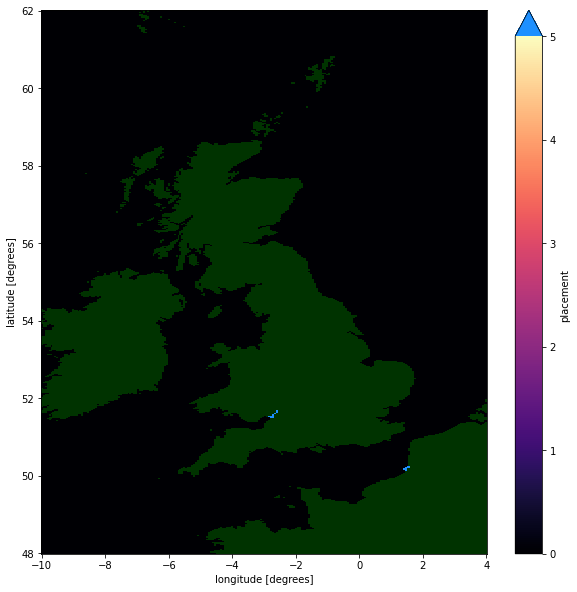

In [47]:
ds = xr.open_dataset('data/processed/map.nc')
uk = ds.empty.values


for j in range(len(modified_sol)):
    uk[modified_sol.iloc[j]['lat_index'],modified_sol.iloc[j]['lon_index']] = 10
    

placement_xr = xr.Dataset({
    'placement': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})


# placement_xr.to_netcdf(path=f'data/processed/ga-21-sol-modified.nc')

ds = xr.open_dataset(f'data/processed/ga-21-sol-modified.nc')

ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('dodgerblue')
cmap.set_under('tomato')
# cmap.set_over('cyan')
# cmap.set_under('magenta')
cmap.set_bad('#003300')

ds.placement.plot(size=10,aspect=1,vmin=0,vmax=5,cmap=cmap)  
# plt.savefig('figures/for-report/ga-mostfrequentmodified-map.png')

4351863975.528626


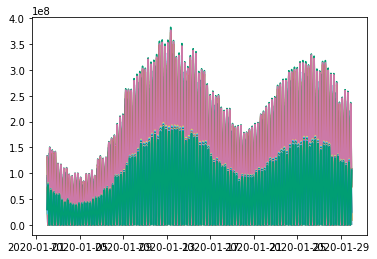

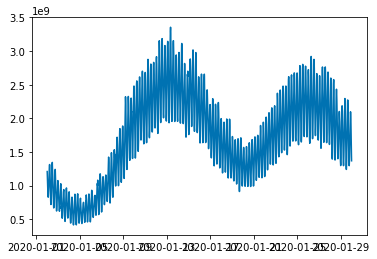

In [48]:
sol_power = 0
plt.figure()
for i in range(20):
    curve = r_power[:,modified_sol.iloc[i]['lat_index'],modified_sol.iloc[i]['lon_index']]
    sol_power += curve
    plt.plot(ds_range.time.values,curve,label=f'{modified_sol.iloc[i,0]}')
    
    
plt.figure()
plt.plot(ds_range.time.values,sol_power)
    
    
sol_mean = np.mean(sol_power)
rmsd = np.sqrt(np.mean((sol_power-sol_mean)**2))
print((sol_mean**2)/rmsd)


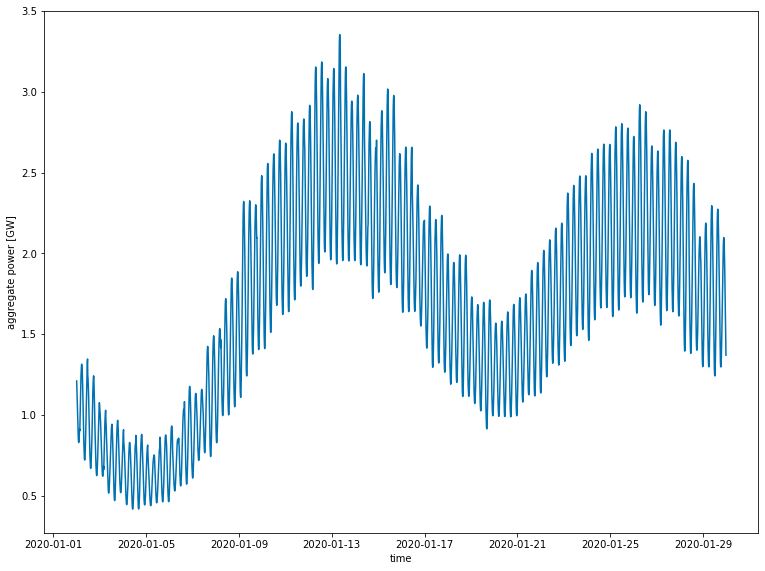

In [50]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,sol_power/1e9)
plt.xlabel('time')
plt.ylabel('aggregate power [GW]')

# plt.savefig('figures/for-report/ga-mostfrequentmodified-power.png')

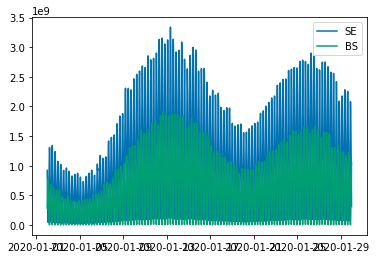

In [54]:
se_power = 0
bds_power = 0

for i in range(10):
    se_curve = r_power[:,se_sol.iloc[i]['lat_index'],se_sol.iloc[i]['lon_index']]
    bds_curve = r_power[:,bds_sol.iloc[i]['lat_index'],bds_sol.iloc[i]['lon_index']]
    se_power += se_curve
    bds_power += bds_curve
    
plt.figure()
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,se_power,label='SE')
plt.plot(ds_range.time.values,bds_power,label='BS')
plt.legend()

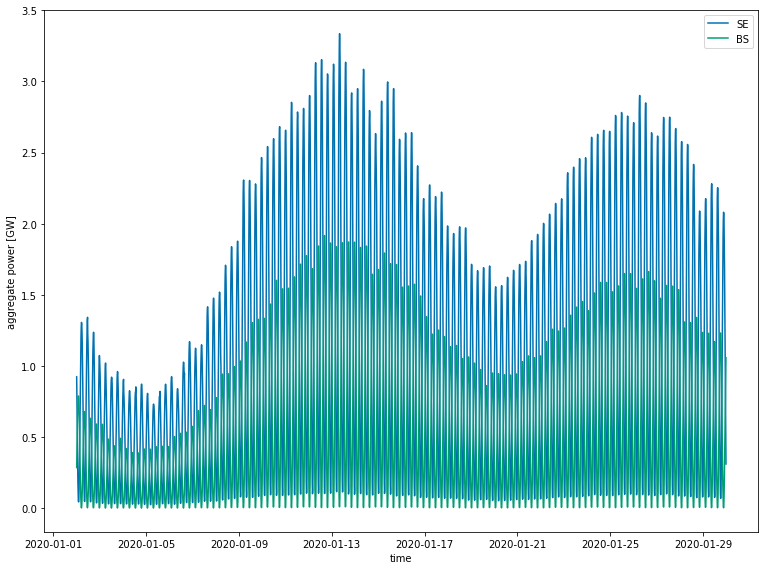

In [60]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values,se_power/1e9,label='SE')
plt.plot(ds_range.time.values,bds_power/1e9,label='BS')
plt.xlabel('time')
plt.ylabel('aggregate power [GW]')
plt.legend()

# plt.savefig('figures/for-report/ga-mostfrequentmodified-powerbreakdown.png')

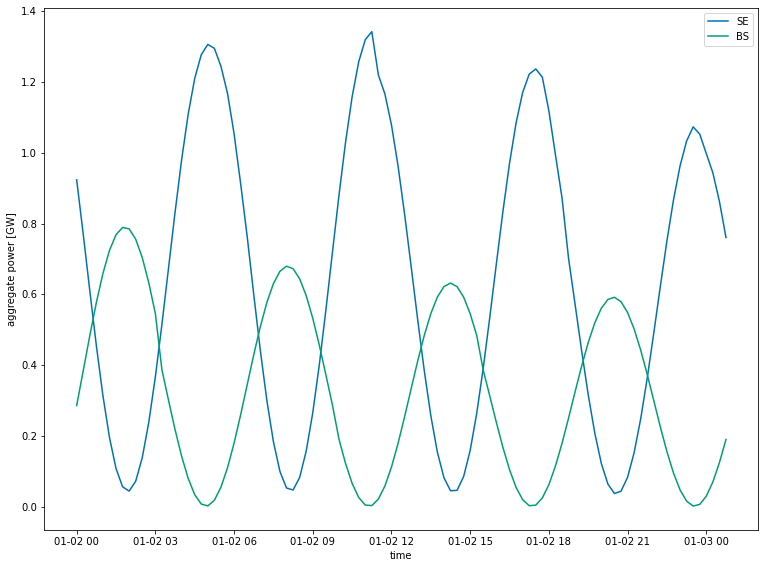

In [61]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(ds_range.time.values[:100],se_power[:100]/1e9,label='SE')
plt.plot(ds_range.time.values[:100],bds_power[:100]/1e9,label='BS')
plt.xlabel('time')
plt.ylabel('aggregate power [GW]')
plt.legend()

# plt.savefig('figures/for-report/ga-mostfrequentmodified-powerbreakdownzoom.png')

In [ ]:
#####

In [ ]:
### fraction of pixels placed in each site for each run of ga

In [4]:
sf = pandas.read_csv('data/processed/solwayfirth.csv')
mb = pandas.read_csv('data/processed/morecambebay.csv')
se = pandas.read_csv('data/processed/severnestuary.csv')
lr = pandas.read_csv('data/processed/larance.csv')
bds = pandas.read_csv('data/processed/baiedesomme.csv')
bds

,Unnamed: 0,flag,lat_index,lon_index,frequency
0,1072,r,70,178,1
1,1073,r,70,179,1
2,1118,r,71,178,1
3,1119,r,71,179,2
4,1120,r,71,180,4
...,...,...,...,...,...
183,2183,r,95,191,2
184,2187,r,96,190,2
185,2188,r,96,191,2
186,2189,r,97,190,2


In [5]:
## order: sf, mb, se, lr, bds

proportion = np.zeros((100,5))

for j in range(1,101):
    df = pandas.read_csv(f'data/processed/ga-results-21/run-{j}-gen-50.csv')
    label = df['Unnamed: 0']
    
    count_sf = 0
    count_mb = 0
    count_se = 0
    count_lr = 0 
    count_bds = 0
    
    for i in range(20):
        if label[i] in np.array(sf['Unnamed: 0']):
            count_sf += 1
            
        if label[i] in np.array(mb['Unnamed: 0']):
            count_mb += 1
            
        if label[i] in np.array(se['Unnamed: 0']):
            count_se += 1
            
        if label[i] in np.array(lr['Unnamed: 0']):
            count_lr += 1
            
        if label[i] in np.array(bds['Unnamed: 0']):
            count_bds += 1 
            
    proportion[j-1,0] = count_sf/20
    proportion[j-1,1] = count_mb/20
    proportion[j-1,2] = count_se/20
    proportion[j-1,3] = count_lr/20
    proportion[j-1,4] = count_bds/20
    
    

In [6]:
for i in range(100):
    assert(np.sum(proportion[i,:])==1)

In [7]:
av_sf = np.mean(proportion[:,0])
av_mb = np.mean(proportion[:,1])
av_se = np.mean(proportion[:,2])
av_lr = np.mean(proportion[:,3])
av_bds = np.mean(proportion[:,4])


sigma_sf = np.std(proportion[:,0])
sigma_mb = np.std(proportion[:,1])
sigma_se = np.std(proportion[:,2])
sigma_lr = np.std(proportion[:,3])
sigma_bds = np.std(proportion[:,4])

In [8]:
x = np.linspace(0,1,500)

def gaussian(av,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*(np.e**(-((x-av)**2)/(2*(sigma**2))))

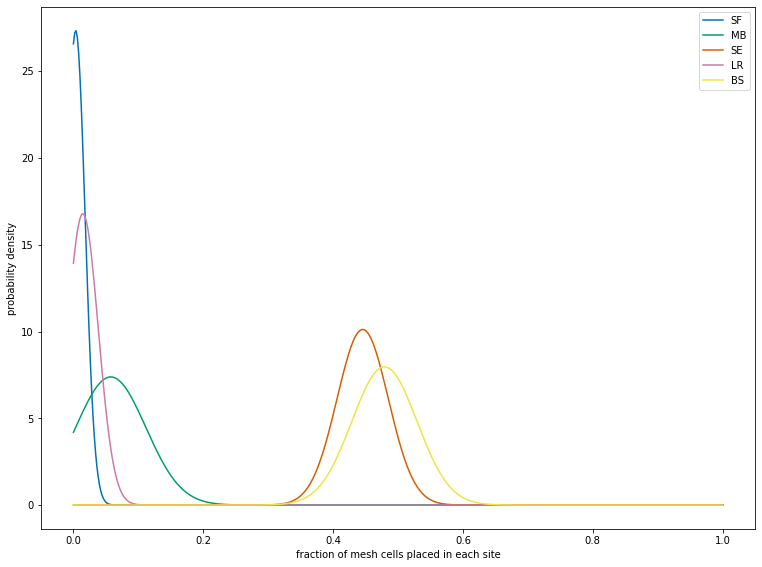

In [10]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(x,gaussian(av_sf,sigma_sf),label='SF')
plt.plot(x,gaussian(av_mb,sigma_mb),label='MB')
plt.plot(x,gaussian(av_se,sigma_se),label='SE')
plt.plot(x,gaussian(av_lr,sigma_lr),label='LR')
plt.plot(x,gaussian(av_bds,sigma_bds),label='BS')
plt.xlabel('fraction of mesh cells placed in each site')
plt.ylabel('probability density')
plt.legend()

# plt.savefig('figures/for-report/ga-gaussian-edit.png')

In [207]:
bds_sf = proportion[:,[4,0]]
bds_sf_unique,bds_sf_count = np.unique(bds_sf,axis=0,return_counts=True)

bds_mb = proportion[:,[4,1]]
bds_mb_unique,bds_mb_count = np.unique(bds_mb,axis=0,return_counts=True)

bds_se = proportion[:,[4,2]]
bds_se_unique,bds_se_count = np.unique(bds_se,axis=0,return_counts=True)

bds_lr = proportion[:,[4,3]]
bds_lr_unique,bds_lr_count = np.unique(bds_lr,axis=0,return_counts=True)

lr_sf = proportion[:,[3,0]]
lr_sf_unique,lr_sf_count = np.unique(lr_sf,axis=0,return_counts=True)

lr_mb = proportion[:,[3,1]]
lr_mb_unique,lr_mb_count = np.unique(lr_mb,axis=0,return_counts=True)

lr_se = proportion[:,[3,2]]
lr_se_unique,lr_se_count = np.unique(lr_se,axis=0,return_counts=True)

se_sf = proportion[:,[2,0]]
se_sf_unique,se_sf_count = np.unique(se_sf,axis=0,return_counts=True)

se_mb = proportion[:,[2,1]]
se_mb_unique,se_mb_count = np.unique(se_mb,axis=0,return_counts=True)

mb_sf = proportion[:,[1,0]]
mb_sf_unique,mb_sf_count = np.unique(mb_sf,axis=0,return_counts=True)

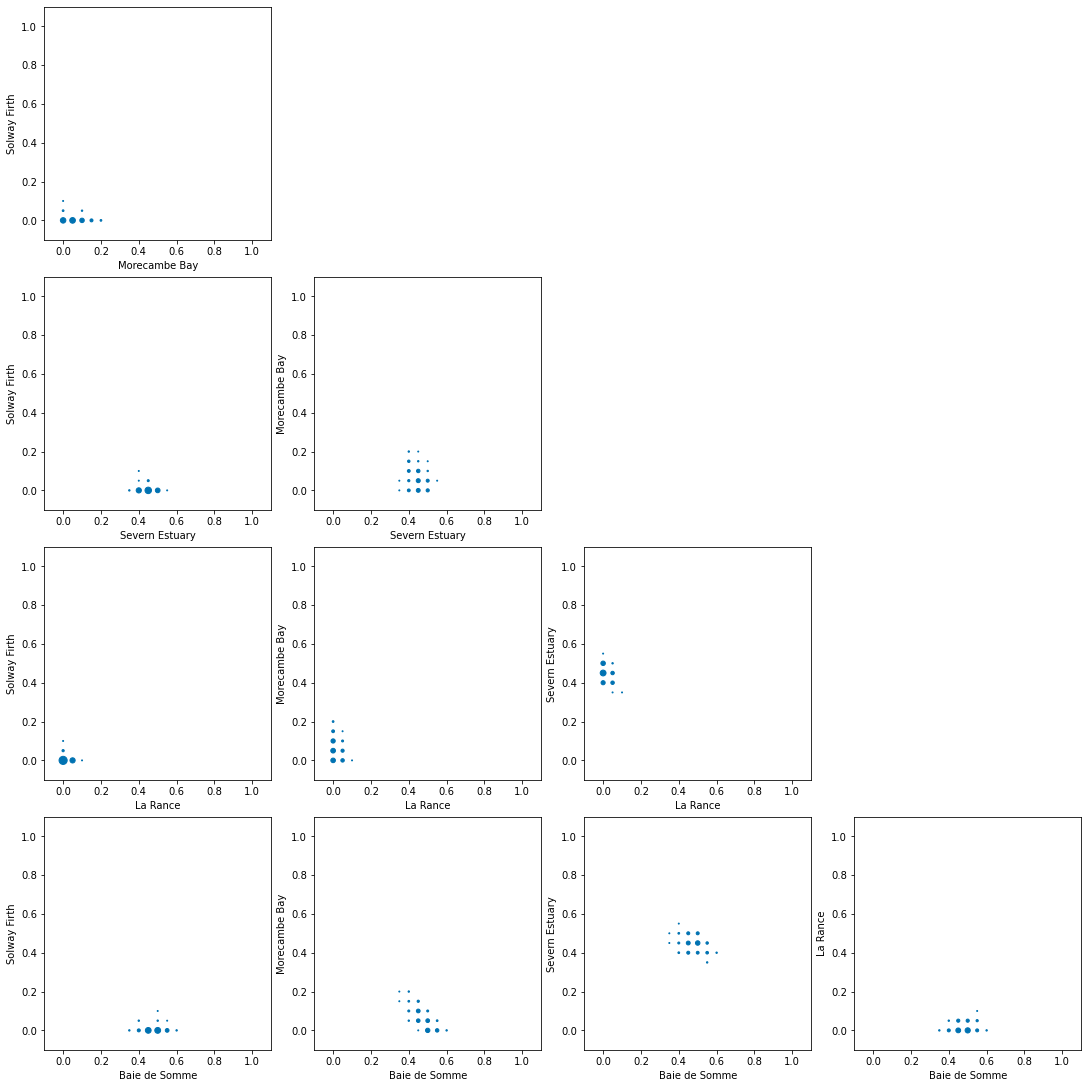

In [234]:
fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(15,15),constrained_layout=True)
plt.style.use('seaborn-colorblind')

fig.delaxes(axes[0,1])
fig.delaxes(axes[0,2])
fig.delaxes(axes[0,3])
fig.delaxes(axes[1,2])
fig.delaxes(axes[1,3])
fig.delaxes(axes[2,3])

mbsf = axes[0,0]
mbsf.scatter(mb_sf_unique[:,0],mb_sf_unique[:,1],mb_sf_count)
mbsf.set_xlim(-0.1,1.1)
mbsf.set_ylim(-0.1,1.1)
mbsf.set_xlabel('Morecambe Bay')
mbsf.set_ylabel('Solway Firth')
# fit.set_title('(a)',fontsize='small',loc='left')

sesf = axes[1,0]
sesf.scatter(se_sf_unique[:,0],se_sf_unique[:,1],se_sf_count)
sesf.set_xlim(-0.1,1.1)
sesf.set_ylim(-0.1,1.1)
sesf.set_xlabel('Severn Estuary')
sesf.set_ylabel('Solway Firth')

semb = axes[1,1]
semb.scatter(se_mb_unique[:,0],se_mb_unique[:,1],se_mb_count)
semb.set_xlim(-0.1,1.1)
semb.set_ylim(-0.1,1.1)
semb.set_xlabel('Severn Estuary')
semb.set_ylabel('Morecambe Bay')


lrsf = axes[2,0]
lrsf.scatter(lr_sf_unique[:,0],lr_sf_unique[:,1],lr_sf_count)
lrsf.set_xlim(-0.1,1.1)
lrsf.set_ylim(-0.1,1.1)
lrsf.set_xlabel('La Rance')
lrsf.set_ylabel('Solway Firth')


lrmb = axes[2,1]
lrmb.scatter(lr_mb_unique[:,0],lr_mb_unique[:,1],lr_mb_count)
lrmb.set_xlim(-0.1,1.1)
lrmb.set_ylim(-0.1,1.1)
lrmb.set_xlabel('La Rance')
lrmb.set_ylabel('Morecambe Bay')


lrse = axes[2,2]
lrse.scatter(lr_se_unique[:,0],lr_se_unique[:,1],lr_se_count)
lrse.set_xlim(-0.1,1.1)
lrse.set_ylim(-0.1,1.1)
lrse.set_xlabel('La Rance')
lrse.set_ylabel('Severn Estuary')



bdssf = axes[3,0]
bdssf.scatter(bds_sf_unique[:,0],bds_sf_unique[:,1],bds_sf_count)
bdssf.set_xlim(-0.1,1.1)
bdssf.set_ylim(-0.1,1.1)
bdssf.set_xlabel('Baie de Somme')
bdssf.set_ylabel('Solway Firth')


bdsmb = axes[3,1]
bdsmb.scatter(bds_mb_unique[:,0],bds_mb_unique[:,1],bds_mb_count)
bdsmb.set_xlim(-0.1,1.1)
bdsmb.set_ylim(-0.1,1.1)
bdsmb.set_xlabel('Baie de Somme')
bdsmb.set_ylabel('Morecambe Bay')



bdsse = axes[3,2]
bdsse.scatter(bds_se_unique[:,0],bds_se_unique[:,1],bds_se_count)
bdsse.set_xlim(-0.1,1.1)
bdsse.set_ylim(-0.1,1.1)
bdsse.set_xlabel('Baie de Somme')
bdsse.set_ylabel('Severn Estuary')


bdslr = axes[3,3]
bdslr.scatter(bds_lr_unique[:,0],bds_lr_unique[:,1],bds_lr_count)
bdslr.set_xlim(-0.1,1.1)
bdslr.set_ylim(-0.1,1.1)
bdslr.set_xlabel('Baie de Somme')
bdslr.set_ylabel('La Rance')


# fig.supxlabel('time [hours]',fontsize='medium')
# fig.supylabel('speed [knots]',fontsize='medium')

# fig.savefig('figures/correlation.png')